### Importing libraries and magics

In [1]:
import sys
import os
sys.path.append(os.getcwd()+"/tools/")
from tester import test_classifier

C:\Users\gunjeet singh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [49]:
#Importing libraries and magics


import sys

from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import re

from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectPercentile, SelectKBest
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import MinMaxScaler

#from tester import test_classifier
import warnings




### Import the file which contain the dataset to our variable

In [5]:
# Load the dictionary containing the dataset
with open(os.getcwd()+"/final_project_dataset.pkl", "rb") as data_file:
    data_init = pickle.load(data_file)

### Converting the dataset from a python dictionary to a pandas dataframe

In [6]:
#Converting the dataset from a python dictionary to a pandas dataframe
data_df = pd.DataFrame.from_dict(data_init, orient='index')
raw_data = data_df.copy()

#### Now check the structure of the new data frame to find out how many total number of observation and column are prsent 

In [7]:
data_df.shape

(146, 21)

#### Print the first 5 values of the data frame 

In [8]:
data_df.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
ALLEN PHILLIP K,201955,2902,2869717,4484442,NaN,4175000,phillip.allen@enron.com,-126027,-3081055,1729541,...,47,1729541,2195,152,65,False,304805,1407,126027,NaN
BADUM JAMES P,NaN,NaN,178980,182466,NaN,NaN,NaN,NaN,NaN,257817,...,NaN,257817,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,NaN,NaN,james.bannantine@enron.com,-560222,-5104,5243487,...,39,4046157,29,864523,0,False,NaN,465,1757552,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,...,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,frank.bay@enron.com,-82782,-201641,63014,...,NaN,NaN,NaN,69,NaN,False,NaN,NaN,145796,NaN


#### The dataset contains information of 21 features from 146 employees.

We can see that column have some values as NaN.
"NaN”s are actually strings so we will replace them with Numpy’s “NaN”s so that we  can count the values which are not NaN
across the variables (column).

In [9]:
data_df.replace(to_replace='NaN', value=np.nan, inplace=True)

In [10]:
data_df.count().sort_values()

loan_advances                  4
director_fees                 17
restricted_stock_deferred     18
deferral_payments             39
deferred_income               49
long_term_incentive           66
bonus                         82
to_messages                   86
shared_receipt_with_poi       86
from_this_person_to_poi       86
from_poi_to_this_person       86
from_messages                 86
other                         93
salary                        95
expenses                      95
exercised_stock_options      102
restricted_stock             110
email_address                111
total_payments               125
total_stock_value            126
poi                          146
dtype: int64

 Above O/P represent the count of the values in each columns of the data frame

 We can observe that the dataset is quite sparse with some variables like Total Payments and Total Stock Value having values for most of the employees but some others like Loan Advances and Director Fees that we have information for too few employees.

We want to find out the records in the data frame which have the mising values. From the above observation we can see that POI variable has the value for all the 146 employees.So we can drop this variable from our data frame. 

##### We can also remove the email_address field since we cannot use it somehow in the analysis and we will create a temporary copy without the label (POI).

In [11]:
#dropping 'poi' and 'email_address' variables
data_df = data_df.drop(["email_address"], axis=1)
data_temp = data_df.drop(["poi"], axis=1)
data_temp[data_temp.isnull().all(axis=1)]


,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
LOCKHART EUGENE E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>LOCKHART EUGENE E </b> is the employe in the teporary data frame which has all the missing value for all the variable so we can drop this employee records from the original data fram

In [12]:
data_df = data_df.drop(["LOCKHART EUGENE E"], axis=0)

#### Next, since some values are related we would like to rearrange the columns in he following order:

In [13]:
cols = [
    'poi', 'salary', 'bonus', 'long_term_incentive', 'deferred_income',
    'deferral_payments', 'loan_advances', 'other', 'expenses', 'director_fees',
    'total_payments', 'exercised_stock_options', 'restricted_stock',
    'restricted_stock_deferred', 'total_stock_value',
    'from_poi_to_this_person', 'shared_receipt_with_poi', 'to_messages',
    'from_this_person_to_poi', 'from_messages'
]
data_df = data_df[cols]
data_df.head()

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,from_poi_to_this_person,shared_receipt_with_poi,to_messages,from_this_person_to_poi,from_messages
ALLEN PHILLIP K,False,201955.0,4175000.0,304805.0,-3081055.0,2869717.0,NaN,152.0,13868.0,NaN,4484442.0,1729541.0,126027.0,-126027.0,1729541.0,47.0,1407.0,2902.0,65.0,2195.0
BADUM JAMES P,False,NaN,NaN,NaN,NaN,178980.0,NaN,NaN,3486.0,NaN,182466.0,257817.0,NaN,NaN,257817.0,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,False,477.0,NaN,NaN,-5104.0,NaN,NaN,864523.0,56301.0,NaN,916197.0,4046157.0,1757552.0,-560222.0,5243487.0,39.0,465.0,566.0,0.0,29.0
BAXTER JOHN C,False,267102.0,1200000.0,1586055.0,-1386055.0,1295738.0,NaN,2660303.0,11200.0,NaN,5634343.0,6680544.0,3942714.0,NaN,10623258.0,NaN,NaN,NaN,NaN,NaN
BAY FRANKLIN R,False,239671.0,400000.0,NaN,-201641.0,260455.0,NaN,69.0,129142.0,NaN,827696.0,NaN,145796.0,-82782.0,63014.0,NaN,NaN,NaN,NaN,NaN


In [14]:
data_df.replace(to_replace=np.NaN, value=0, inplace=True)

In [15]:
data_df.head()

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,from_poi_to_this_person,shared_receipt_with_poi,to_messages,from_this_person_to_poi,from_messages
ALLEN PHILLIP K,False,201955.0,4175000.0,304805.0,-3081055.0,2869717.0,0.0,152.0,13868.0,0.0,4484442.0,1729541.0,126027.0,-126027.0,1729541.0,47.0,1407.0,2902.0,65.0,2195.0
BADUM JAMES P,False,0.0,0.0,0.0,0.0,178980.0,0.0,0.0,3486.0,0.0,182466.0,257817.0,0.0,0.0,257817.0,0.0,0.0,0.0,0.0,0.0
BANNANTINE JAMES M,False,477.0,0.0,0.0,-5104.0,0.0,0.0,864523.0,56301.0,0.0,916197.0,4046157.0,1757552.0,-560222.0,5243487.0,39.0,465.0,566.0,0.0,29.0
BAXTER JOHN C,False,267102.0,1200000.0,1586055.0,-1386055.0,1295738.0,0.0,2660303.0,11200.0,0.0,5634343.0,6680544.0,3942714.0,0.0,10623258.0,0.0,0.0,0.0,0.0,0.0
BAY FRANKLIN R,False,239671.0,400000.0,0.0,-201641.0,260455.0,0.0,69.0,129142.0,0.0,827696.0,0.0,145796.0,-82782.0,63014.0,0.0,0.0,0.0,0.0,0.0


#### Now that the features are in the right order, we can examine the statistics of the dataset.

In [16]:
data_df.describe()

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,from_poi_to_this_person,shared_receipt_with_poi,to_messages,from_this_person_to_poi,from_messages
count,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,145.000000,145.000000,145.000000,145.000000,145.000000
mean,3.683342e+05,1.342671e+06,6.692680e+05,-3.854019e+05,4.418227e+05,1.157586e+06,5.894693e+05,7.123619e+04,1.955643e+04,4.380626e+06,4.211583e+06,1.761321e+06,2.065786e+04,5.886335e+06,38.489655,697.765517,1230.013793,24.455172,361.075862
std,2.211001e+06,8.121319e+06,4.059716e+06,2.386279e+06,2.750583e+06,9.682311e+06,3.694784e+06,4.341759e+05,1.194559e+05,2.702539e+07,2.615843e+07,1.093676e+07,1.444650e+06,3.636916e+07,74.088359,1075.128126,2232.153003,79.527073,1445.944684
min,0.000000e+00,0.000000e+00,0.000000e+00,-2.799289e+07,-1.025000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.604490e+06,-7.576788e+06,-4.409300e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,-3.834600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.025000e+05,0.000000e+00,3.246000e+04,0.000000e+00,2.520550e+05,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.106920e+05,3.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.720000e+02,2.153000e+04,0.000000e+00,9.665220e+05,6.087500e+05,3.605280e+05,0.000000e+00,9.760370e+05,4.000000,114.000000,312.000000,0.000000,17.000000
75%,2.714420e+05,8.000000e+05,3.753040e+05,0.000000e+00,1.025900e+04,0.000000e+00,1.506560e+05,5.394700e+04,0.000000e+00,1.979596e+06,1.729541e+06,8.530640e+05,0.000000e+00,2.332399e+06,41.000000,900.000000,1607.000000,14.000000,52.000000
max,2.670423e+07,9.734362e+07,4.852193e+07,0.000000e+00,3.208340e+07,8.392500e+07,4.266759e+07,5.235198e+06,1.398517e+06,3.098866e+08,3.117640e+08,1.303223e+08,1.545629e+07,4.345095e+08,528.000000,5521.000000,15149.000000,609.000000,14368.000000


## Outlier Investigation

My first attempt to spot any possible outliers will be visual.
We will use Seaborn’s pairplot which present in the same time the distribution of the variables and a scatter plot representation of them

We are using 4 variables ("total_payments", "exercised_stock_options", "restricted_stock", "total_stock_value") from the data set to plot the graph as these variables has the heighest variance.

In [17]:
sns.pairplot(data=data_df, vars=["total_payments", "exercised_stock_options", "restricted_stock", "total_stock_value"], hue="poi")


#### There are two datapoints far away from the cluster of the rest. We will use the Total Payments to find them.

In [18]:
data_df.total_payments.nlargest(2)

TOTAL            309886585.0
LAY KENNETH L    103559793.0
Name: total_payments, dtype: float64

In [19]:
data_df.loc[['TOTAL']]

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,from_poi_to_this_person,shared_receipt_with_poi,to_messages,from_this_person_to_poi,from_messages
TOTAL,False,26704229.0,97343619.0,48521928.0,-27992891.0,32083396.0,83925000.0,42667589.0,5235198.0,1398517.0,309886585.0,311764000.0,130322299.0,-7576788.0,434509511.0,0.0,0.0,0.0,0.0,0.0


#### The first one ‘TOTAL’, is the totals on the Payments Schedule and not a person so it should be removed.
The second one is not an outlier, it is just the huge payment and stock value o Kenneth Lay. Datapoints like this are not outliers; in fact anomalies like this may lead us to the rest of the POIs. These extreme values lead the rest of the employees to the bottom left corner of the scatterplot. 

In [20]:
data_df.drop("TOTAL", inplace=True)

In [21]:
sns.pairplot(data=data_df, vars=["total_payments", "exercised_stock_options", "restricted_stock", "total_stock_value"], hue="poi")


#### With the “TOTAL” removed the scatter plots are much more uncluttered and we can see some trends on them.
We can notice also a negative value on Restricted Stock variable, an indication that more outliers may exist.
We can make a first sanity by checking if the individual values sum with the totals of each category (Total Payments, Total Stock Value).

In [22]:
print(data_df.sum()[1:11])
print("---")
print("Sum all 'payment' variables:", sum(data_df.sum()[1:10]))


salary                  26704229.0
bonus                   97343619.0
long_term_incentive     48521928.0
deferred_income        -27890391.0
deferral_payments       31980896.0
loan_advances           83925000.0
other                   42805453.0
expenses                 5094049.0
director_fees            1437166.0
total_payments         325304226.0
dtype: float64
---
Sum all 'payment' variables: 309921949.0


In [23]:
print(data_df.sum()[11:15])
print("---")
print("Sum all 'stock' variables:", sum(data_df.sum()[11:14]))

exercised_stock_options      298915485.0
restricted_stock             125069226.0
restricted_stock_deferred     10572178.0
total_stock_value            419009128.0
dtype: float64
---
Sum all 'stock' variables: 434556889.0


#### We can see that the totals do not match. We need to check each employee by employee data to find the errors.

Now to find the error we will find the sum of all the variable from column 2-11 and compare with the value of the 11th variable ("Total_payment").And if the value doenst match we will list those emplyees in the new list.
Same way we will be comparing the sum of all the variables from column 12-15 and cross check with values of column 15("Total Stock").And if the value doesnt match we will list the emplyee detail in the list

In [24]:
alist = []
for line in data_df.itertuples():
    if sum(line[2:11]) != line[11] or sum(line[12:15]) != line[15]:
        alist.append(line[0])
data_df.loc[alist]

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,from_poi_to_this_person,shared_receipt_with_poi,to_messages,from_this_person_to_poi,from_messages
BELFER ROBERT,False,0.0,0.0,0.0,0.0,-102500.0,0.0,0.0,0.0,3285.0,102500.0,3285.0,0.0,44093.0,-44093.0,0.0,0.0,0.0,0.0,0.0
BHATNAGAR SANJAY,False,0.0,0.0,0.0,0.0,0.0,0.0,137864.0,0.0,137864.0,15456290.0,2604490.0,-2604490.0,15456290.0,0.0,0.0,463.0,523.0,1.0,29.0


In [25]:
data_df.loc["BELFER ROBERT", :]

poi                           False
salary                            0
bonus                             0
long_term_incentive               0
deferred_income                   0
deferral_payments           -102500
loan_advances                     0
other                             0
expenses                          0
director_fees                  3285
total_payments               102500
exercised_stock_options        3285
restricted_stock                  0
restricted_stock_deferred     44093
total_stock_value            -44093
from_poi_to_this_person           0
shared_receipt_with_poi           0
to_messages                       0
from_this_person_to_poi           0
from_messages                     0
Name: BELFER ROBERT, dtype: object

In [26]:
data_df.loc["BELFER ROBERT", :] = [
    False, 0, 0, 0, 0, -102500, 3285, 0, 0, 102500, 3285, -44093, 0, 44093, 0,
    0, 0, 0, 0, 0
]
data_df.loc["BHATNAGAR SANJAY", :] = [
    False, 0, 0, 0, 0, 0, 137864, 0, 0, 0, 137864, -2604490, 15456290, 2604490,
    15456290, 0, 463, 523, 1, 29
]

#### Now that we do not have any more outliers we can plot the two aggregated variables, Total Payments and Total Stock Value.

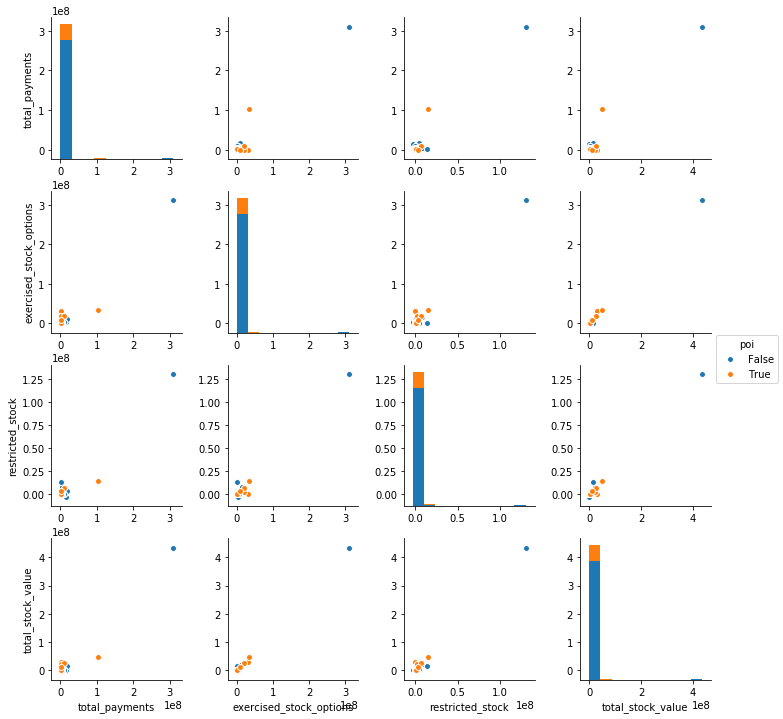

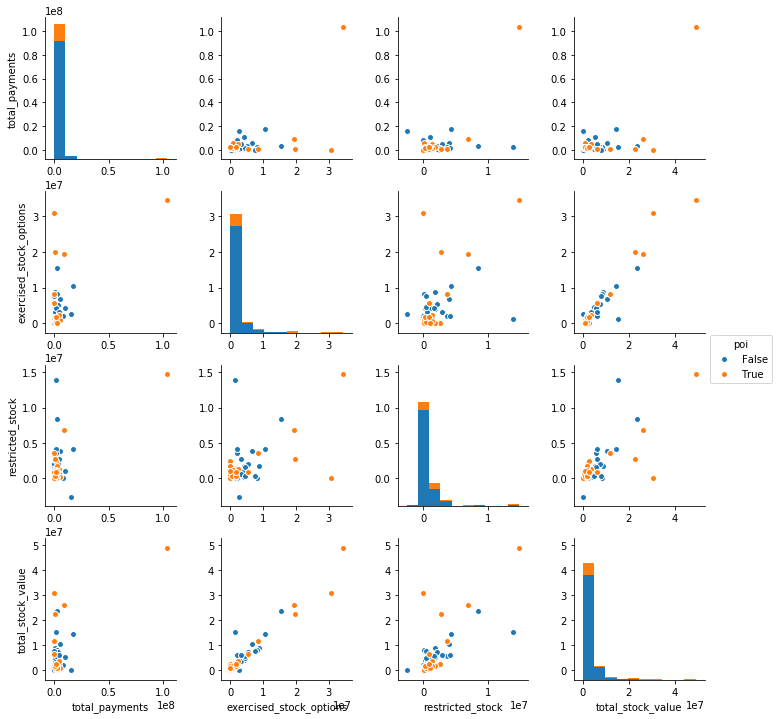

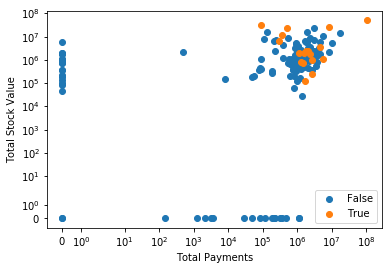

In [27]:
fig1, ax = plt.subplots()
for poi, data in data_df.groupby(by="poi"):
    ax.plot(data['total_payments'],data['total_stock_value'],'o', label=poi)
ax.legend()
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel("Total Payments")
plt.ylabel("Total Stock Value")

plt.show()

We can see that there are some persons with zero salary or bonus (or both) and none of them is a POI. Since we have a sparse number of POIs it might be beneficial to remove them to have a more dense dataset. We will create a copy of the dataset with the specific persons removed for future evaluation.

In [28]:
data_nbs = data_df[data_df.salary > 0]
data_nbs = data_nbs[data_nbs.bonus > 0]
data_nbs.shape

(81, 20)

We can notice that the indexes / names in the dataset are in the form Sirname Name Initial. We will search all the indexes using regular expressions and print the indexes that do not follow this pattern.

In [29]:
for index in data_df.index:
    if re.match('^[A-Z]+\s[A-Z]+(\s[A-Z])?$', index):
        continue
    else:
        print(index)

BLAKE JR. NORMAN P
BOWEN JR RAYMOND M
DERRICK JR. JAMES V
DONAHUE JR JEFFREY M
GARLAND C KEVIN
GLISAN JR BEN F
OVERDYKE JR JERE C
PEREIRA PAULO V. FERRAZ
SULLIVAN-SHAKLOVITZ COLLEEN
THE TRAVEL AGENCY IN THE PARK
WALLS JR ROBERT H
WHITE JR THOMAS E
WINOKUR JR. HERBERT S
YEAGER F SCOTT


In [30]:
data_df.loc[["THE TRAVEL AGENCY IN THE PARK"]]

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,from_poi_to_this_person,shared_receipt_with_poi,to_messages,from_this_person_to_poi,from_messages
THE TRAVEL AGENCY IN THE PARK,False,0.0,0.0,0.0,0.0,0.0,0.0,362096.0,0.0,0.0,362096.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There is a “suspicious” index. The THE TRAVEL AGENCY IN THE PARK, isn’t obviously a name of an employee.So we need to drop it from the data set.

In [31]:
data_df = data_df.drop(["THE TRAVEL AGENCY IN THE PARK"], axis=0)

#### As a final step in outlier investigation, We need to search for extreme values.The extreme values is an essential information and they should be kept but let’s spot them first.
We will be using Tukey Fences with 3 IQRs for every single feature.

In [32]:
def outliers_iqr(dataframe, features):
    result = set()
    for feature in features:
        ys = dataframe[[feature]]
        quartile_1, quartile_3 = np.percentile(ys, [25, 75])
        iqr = quartile_3 - quartile_1
        lower_bound = int(round(quartile_1 - (iqr * 3)))
        upper_bound = int(round(quartile_3 + (iqr * 3)))
        partial_result = list(np.where((ys > upper_bound) | (ys < lower_bound))[0])
        print(feature, len(partial_result))
        result.update(partial_result)
        
    print("-----------------------------------------------------")
    print("")
    print("Total number of records with extreme values: " + str(len(result)))
    
    return list(result)

In [33]:
cols.remove("poi")
xtr_values =outliers_iqr(data_df, cols)



salary 1
bonus 5
long_term_incentive 11
deferred_income 24
deferral_payments 34
loan_advances 5
other 13
expenses 2
director_fees 15
total_payments 5
exercised_stock_options 11
restricted_stock 10
restricted_stock_deferred 17
total_stock_value 11
from_poi_to_this_person 11
shared_receipt_with_poi 4
to_messages 6
from_this_person_to_poi 13
from_messages 20
-----------------------------------------------------

Total number of records with extreme values: 93


In [34]:
a = data_df.loc[:, "poi"].value_counts()
poi_density = a[1]/(a[0]+a[1])
print("POI density on the original dataset: " + str(poi_density))
a = data_df.ix[xtr_values, "poi"].value_counts()
poi_density_xtr = a[1]/(a[0]+a[1])
poi_density_xtr = a[1]/(a[0]+a[1])
print("POI density on the subset with the extreme values: " + str(poi_density_xtr))

print("Difference: " +str((poi_density_xtr - poi_density) / poi_density))



POI density on the original dataset: 0.125874125874
POI density on the subset with the extreme values: 0.161290322581
Difference: 0.281362007168


C:\Users\gunjeet singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


We see that in the subset of employees with extreme value to at least one variable, there are 28% more POIs than in the general dataset. This justify our intuition that the extreme values are related with being a POI, thus we will not remove them.

Now that the dataset is clear of outliers we can find the final dimensions and split the labels from the features and have a first scoring as a baseline for the rest of the analysis. I will use the LinearSVC classifier which seems the more appropriate to begin.

In [35]:
data_df.shape

(143, 20)

In [36]:
data_df.loc[:, "poi"].value_counts()

False    125
True      18
Name: poi, dtype: int64

In [37]:
def do_split(data):
    X = data.copy()
    #Removing the poi labels and put them in a separate array, transforming it
    #from True / False to 0 / 1
    y = X.pop("poi").astype(int)
    
    return X, y, 

In [38]:
X, y = do_split(data_nbs)

In [39]:
#test_classifier() demands the dataset in a dictionary and the features labels
#in a list with 'poi' first.
features = data_df.columns.tolist()
data = data_df.to_dict(orient='index')

test_classifier(LinearSVC(random_state=42), data, features)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)
	Accuracy: 0.72980	Precision: 0.20324	Recall: 0.35150	F1: 0.25756	F2: 0.30675
	Total predictions: 15000	True positives:  703	False positives: 2756	False negatives: 1297	True negatives: 10244



We are interested in the ability of the classifier not to label as Person Of Interest (POI) a person that is not, and also to find all the POIs so the metrics that we are most interested are Precision and Recall. Since we want to maximize both in the same time we will try to maximize the F1 score which can be interpreted as a weighted average of the precision and recall.

We can see that the initial scores are very low with the LinearSVC classifier being poor in classifying the right persons.

So now we will apply the transforming features on the variables and add them to the data set.We will find the propotion of each of the variable and try to add them in the data frame and compare the original variable with new transforming feature  variable in the data  set

## Optimize Feature Selection/Engineering

#### In some cases the value of a variable is less important than its proportion to an aggregated value.

In [40]:
data = data_df.copy()
data.loc[:, "salary_p"] = data.loc[:, "salary"]/data.loc[:, "total_payments"]
data.loc[:, "deferral_payments_p"] = data.loc[:, "deferral_payments"]/data.loc[:, "total_payments"]
data.loc[:, "loan_advances_p"] = data.loc[:, "loan_advances"]/data.loc[:, "total_payments"]
data.loc[:, "bonus_p"] = data.loc[:, "bonus"]/data.loc[:, "total_payments"]
data.loc[:, "deferred_income_p"] = data.loc[:, "deferred_income"]/data.loc[:, "total_payments"]
data.loc[:, "expenses_p"] = data.loc[:, "expenses"]/data.loc[:, "total_payments"]
data.loc[:, "other_p"] = data.loc[:, "other"]/data.loc[:, "total_payments"]
data.loc[:, "long_term_incentive_p"] = data.loc[:, "long_term_incentive"]/data.loc[:, "total_payments"]
data.loc[:, "director_fees_p"] = data.loc[:, "director_fees"]/data.loc[:, "total_payments"]

data.loc[:, "restricted_stock_deferred_p"] = data.loc[:, "restricted_stock_deferred"]/data.loc[:, "total_stock_value"]
data.loc[:, "exercised_stock_options_p"] = data.loc[:, "exercised_stock_options"]/data.loc[:, "total_stock_value"]
data.loc[:, "restricted_stock_p"] = data.loc[:, "restricted_stock"]/data.loc[:, "total_stock_value"]

data.loc[:, "from_poi_to_this_person_p"] = data.loc[:, "from_poi_to_this_person"]/data.loc[:, "to_messages"]
data.loc[:, "shared_receipt_with_poi_p"] = data.loc[:, "shared_receipt_with_poi"]/data.loc[:, "to_messages"]

data.loc[:, "from_this_person_to_poi_p"] = data.loc[:, "from_this_person_to_poi"]/data.loc[:, "from_messages"]
    
data.replace(to_replace=np.NaN, value=0, inplace=True)
data.replace(to_replace=np.inf, value=0, inplace=True)
data.replace(to_replace=-np.inf, value=0, inplace=True)

### Now we can plot the importance of the features of the “enriched” dataset by using the same classifier.

In [41]:
def plot_importance(dataset):
    X, y = do_split(dataset)

    selector = SelectPercentile(percentile=100)
    a = selector.fit(X, y)

    plt.figure(figsize=(12,9))
    sns.barplot(y=X.columns, x=a.scores_)



In [42]:
plot_importance(data)



Comparing the newly created features with the original we can see that the proportions of “Long Term Incentive”, “Restricted Stock Deferred” and “From This Person to POI” score higher than the original features. We will keep these and remove the original values. to avoid bias the model towards a specific feature by using both the original value and its proportion.

In [43]:
#Adding the proportions
data_df.loc[:, "long_term_incentive_p"] = data_df.loc[:, "long_term_incentive"]/data_df.loc[:, "total_payments"]
data_df.loc[:, "restricted_stock_deferred_p"] = data_df.loc[:, "restricted_stock_deferred"]/data_df.loc[:, "total_stock_value"]
data_df.loc[:, "from_this_person_to_poi_p"] = data_df.loc[:, "from_this_person_to_poi"]/data_df.loc[:, "from_messages"]
#Removing the original values.
data_df.drop("long_term_incentive", axis=1)
data_df.drop("restricted_stock_deferred", axis=1)
data_df.drop("from_this_person_to_poi", axis=1)
#Correcting NaN and infinity values created by zero divisions
data_df.replace(to_replace=np.NaN, value=0, inplace=True)
data_df.replace(to_replace=np.inf, value=0, inplace=True)
data_df.replace(to_replace=-np.inf, value=0, inplace=True)

In [44]:
plot_importance(data_df)

## Features Scaling

There are features in the dataset with big differences in scaling. For example salary appears with values between 0 and 2.5 millions while from_this_person_to_poi_p takes values in the range [0,1). 
So we need to scale them

## Nearest Neighbors

In [ ]:
#Nearest Neighbors
#warnings.filterwarnings('ignore')

pipe = Pipeline([('scale', MaxAbsScaler()),
                 ('reduce_dim', PCA(random_state=42)),
                 ('classify', KNeighborsClassifier())])

N_FEATURES_OPTIONS = list(range(2, 21))
N_NEIGHBORS = [1, 3, 5]

param_grid = [
    {
        'scale': [None, MaxAbsScaler()],
        'reduce_dim': [PCA(random_state=42)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__weights': ["uniform", "distance"],
        'classify__n_neighbors': N_NEIGHBORS,
        'classify__p':[1, 2]
    },
    {
        'scale': [None, MaxAbsScaler()],
        'reduce_dim': [SelectKBest()],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__weights': ["uniform", "distance"],
        'classify__n_neighbors': N_NEIGHBORS,
        'classify__p':[1, 2]
    },
]

cv = StratifiedShuffleSplit(random_state=42)
grid = GridSearchCV(
    pipe, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1)

grid.fit(X, y)

print(grid.best_estimator_)

In [45]:
features = data_df.columns.tolist()
data = data_df.to_dict(orient='index')
test_classifier(grid.best_estimator_, data, features)



Pipeline(memory=None,
     steps=[('scale', MaxAbsScaler(copy=True)), ('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance'))])
	Accuracy: 0.85593	Precision: 0.43385	Recall: 0.26400	F1: 0.32826	F2: 0.28643
	Total predictions: 15000	True positives:  528	False positives:  689	False negatives: 1472	True negatives: 12311



### Predicction:

Predict on the Test data and print the POIs and their email ids

In [47]:
## Prediction
prediction = grid.predict(X)

## Build DataFrame
pred = pd.DataFrame(prediction,index = X.index,columns=["poi"])
pred.poi.value_counts()
pred[pred.poi == 1].index

## Identify thee email id's of POI
raw_data.ix[pred[pred.poi == 1].index].email_address

BELDEN TIMOTHY N                tim.belden@enron.com
BHATNAGAR SANJAY          sanjay.bhatnagar@enron.com
BOWEN JR RAYMOND M           raymond.bowen@enron.com
CALGER CHRISTOPHER F    christopher.calger@enron.com
CAUSEY RICHARD A            richard.causey@enron.com
COLWELL WESLEY                 wes.colwell@enron.com
DELAINEY DAVID W            david.delainey@enron.com
FASTOW ANDREW S              andrew.fastow@enron.com
GLISAN JR BEN F                 ben.glisan@enron.com
HIRKO JOSEPH                     joe.hirko@enron.com
KOENIG MARK E                  mark.koenig@enron.com
KOPPER MICHAEL J            michael.kopper@enron.com
LAY KENNETH L                  kenneth.lay@enron.com
RICE KENNETH D                    ken.rice@enron.com
RIEKER PAULA H                paula.rieker@enron.com
SHELBY REX                      rex.shelby@enron.com
SKILLING JEFFREY K           jeff.skilling@enron.com
YEAGER F SCOTT                scott.yeager@enron.com
Name: email_address, dtype: object

### Sequential Exception Technique (SET):

Identify the POIs using SET and print their names.

In [46]:
SET_data = data_df.copy()

In [47]:
cols = [0,11,12,13,14,15,16,17,18,19,20,21,22]
SET_data.drop(SET_data.columns[cols], axis=1, inplace=True)

In [48]:
SET_data.head()

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments
ALLEN PHILLIP K,201955.0,4175000.0,304805.0,-3081055.0,2869717.0,0.0,152.0,13868.0,0.0,4484442.0
BADUM JAMES P,0.0,0.0,0.0,0.0,178980.0,0.0,0.0,3486.0,0.0,182466.0
BANNANTINE JAMES M,477.0,0.0,0.0,-5104.0,0.0,0.0,864523.0,56301.0,0.0,916197.0
BAXTER JOHN C,267102.0,1200000.0,1586055.0,-1386055.0,1295738.0,0.0,2660303.0,11200.0,0.0,5634343.0
BAY FRANKLIN R,239671.0,400000.0,0.0,-201641.0,260455.0,0.0,69.0,129142.0,0.0,827696.0


In [50]:
cols = [
    'salary', 'bonus', 'long_term_incentive', 'deferred_income',
    'deferral_payments', 'loan_advances', 'other', 'expenses', 'director_fees',
    'total_payments'
]

In [51]:
scaler = MinMaxScaler()
SET_data[cols] = scaler.fit_transform(SET_data[cols])

In [52]:
e_names = pd.Series(SET_data.index)

In [53]:
def SET(m,SET_data):
# Set the value of parameter m = the no. of iterations you require
    Card = pd.Series(np.NAN)
    DS=pd.Series(np.NAN)
    idx_added = pd.Series(np.NAN)
    pos = 0
    for j in range(1,m+1):
        new_indices = np.random.choice(e_names.index,len(e_names),replace=False)
        for i in pd.Series(new_indices).index:
            idx_added[i+pos] = new_indices[i]
            DS[i+pos]=sum(np.var(SET_data.loc[e_names[new_indices[:i+1]]]))
            Card[i+pos] = len(e_names[:i+1])
        pos = pos+i+1

    df = pd.DataFrame({'Index_added':idx_added,'DS':DS,'Card':Card})
    df ['DS_Prev'] = df.DS.shift(1)
    df['Card_prev'] = df.Card.shift(1)
    df.Card_prev[(df.Card == 1)] = 0
    df = df.fillna(0)
    df['Smoothing'] = (df.Card - df.Card_prev)*(df.DS - df.DS_Prev)


    # find indexes of sets with max sf
    maxsf = []
    for i in range(len(df.DS)):
        if df.Smoothing[i] == df.Smoothing.max():
            maxsf.append(i)
    #print(maxsf)

    N = len(e_names)
    excp_set = []
    for i in range(len(maxsf)):
        j = maxsf[i]
        k=j+1
        temp = []
        temp.append(df.Index_added[j])
        excp_set.append(temp.copy())
        temp_prev = pd.DataFrame()
        temp_j = pd.DataFrame()
        a=j
        while(a%N!=0):
            temp_row = SET_data.loc[e_names[df.Index_added[a]]]
            temp_j = temp_j.append(temp_row)
            a=a-1
        temp_row = SET_data.loc[e_names[df.Index_added[a]]]
        temp_j = temp_j.append(temp_row)
        temp_prev = temp_j.copy()                   # Ij-1
        temp_prev.drop(temp_prev.index[0],inplace=True)
        #temp_prev.index = np.arange(len(temp_prev))
        while(k%N!=0):
            K_element = SET_data.loc[e_names[df.Index_added[k]]]    # K th element
            temp_prev = temp_prev.append(K_element)            # Ij-1 U {ik}
            temp_j = temp_j.append(K_element)               # Ij U {ik}
            Dk0 = sum(np.var(temp_prev)) - df.DS[j-1]
            Dk1 = sum(np.var(temp_j)) - df.DS[j]
            if Dk0-Dk1 >= df.DS[j]:                # If Dk0 - Dk1 >= Dj we add the element to exception set.
                excp_set[i].append(df.Index_added[k])
            temp_prev.drop(temp_prev.index[len(temp_prev)-1],inplace=True)
            temp_j.drop(temp_j.index[len(temp_j)-1],inplace=True)
            k+=1
    #print(excp_set)                                # contains the indices of exception elements.
    return excp_set


In [58]:
excp_set = SET(1000,SET_data)

In [60]:
# Printing the POIs.
print("\nException set: \n")
for i in range(len(excp_set)):
    print(e_names[excp_set[i]])


Exception set: 

79.0    LAY KENNETH L
dtype: object
